34 937 25312
464.33987756516143


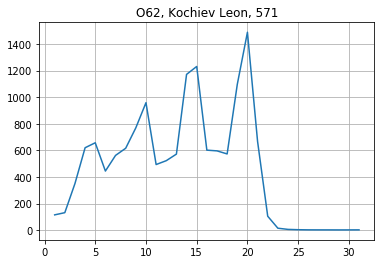

In [14]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

rMIN = 0
rMAX = 1.8
a = 0.6
b = 1.2

d = 1
C = 0.8
c = 2                                                                                              
N = 0.5

def mean(nums):
    return float(sum(nums)) / len(nums)

def u(I, I1):

    h = (rMAX - rMIN) / I
    t = C * h / c
    h1 = (rMAX - rMIN) / I1
    t1 = C * h1 / c
    nt = int(N / t1)


    def v0(r):
        if (r < b) & (r > a):
            return m.exp((-4*(2*r - (a + b))**2) / ((b - a)**2 - (2*r - (a + b))**2))
        else:
            return 0

    r = [rMIN + (i - 0.5)*h for i in range(I + 2)]

    a1 = [t1**2 * c**2 * r[i]**(1-d) / h for i in range(I + 2)]
    a2 = [(r[i] + h/2)**(d-1) / h for i in range(I + 2)]
    a3 = [(r[i] - h/2)**(d-1) / h for i in range(I + 2)]

    u0 = [v0(r[i]) for i in range(I + 2)]
    u1 = u0.copy()

    u_next = [0 for i in range(I + 2)]

    u11 = [0 for i in range(I + 2)]
    u12 = [0 for i in range(I + 2)]
    u13 = [0 for i in range(I + 2)]
    for i in range(1, I + 1):
        u12[i] = a1[i] * (a2[i] * (u0[i + 1] - u0[i]) - a3[i] * (u0[i] - u0[i - 1]))

    for i in range(1, I + 2):
        u1[i] = u0[i] + 0.5 * u12[i]

    u_prev = u0.copy()
    u_curr = u1.copy()

    par = [-49/36, 3/2, -3/20, 1/90]

    sol = [[0 for i in range(I)] for n in range(nt)]
    sol[0] = u0[1:I + 1]
    if (I == 50):
        plt.ylim(-8, 8)
        plt.xlim(rMIN, rMAX)
        plt.title('1D Wave' + ' Кочиев Леон 571 гр.')
        plt.text(0.6, 6, 'n*tau = ' + ("%.4f" % (0)) + '\nCDS = ' + str(C) + ' space = ' + str(d) + 'D Tmax = ' + str(N))
        plt.plot(r[1:I + 1], sol[0])
        plt.grid()
        plt.savefig('/home/nullkatar/Документы/' + str(0) + '.png')
        plt.close()
    for n in range(1, nt):
        sol[n] = u_curr[1:I + 1]
        for i in range(3, I - 1):
            u_next[i] = 2*u_curr[i] - u_prev[i]
            for k in range(4):
                sum = t1**2 * c**2 / h**2 * par[k] * (u_curr[i - k] + u_curr[i + k])
                u_next[i] += sum


        u_prev = u_curr.copy()
        u_curr = u_next.copy()

        u_curr[2] = u_curr[3]
        u_curr[I-1] = u_curr[I - 2]
        u_curr[0] = u_curr[3]
        u_curr[1] = u_curr[3]
        u_curr[I] = u_curr[I - 2]
        u_curr[I + 1] = u_curr[I - 2]
    return sol


def NT(I1):
    h1 = (rMAX - rMIN) / I1
    t1 = C * h1 / c
    nt1 = int(N / t1)
    return nt1

I = 50

nt1 = NT(50)
nt2 = NT(3**3*50)
nt3 = NT(3**6*50)

print(nt1, nt2, nt3)

u1 = u(50, 50)
u2 = u(150, 50*3**3)
u3 = u(450, 50*3**6)

nt = nt1 - 2

d1 = [[0 for i in range(I)] for n in range(nt)]
d2 = [[0 for i in range(I)] for n in range(nt)]
for n in range(1, nt):
    for i in range(I):
        j = 3*i + 1
        k = 9*i + 4
        d1[n][i] = abs(u1[n][i] - u2[3**3*n][j])
        d2[n][i] = abs(u2[3**3*n][j] - u3[3**6*n][k])


u1m = [0 for n in range(nt)]
u2m = [0 for n in range(nt)]
for n in range(1, nt):

    u1m[n] = max(d1[n])
    u2m[n] = max(d2[n])

alpha = [u1m[n] / (u2m[n]) for n in range(1, nt)]
print(mean(alpha))
time = [n for n in range(1, nt)]
plt.title("O62, Kochiev Leon, 571")
plt.plot(time, alpha)
plt.grid()
plt.show()